In [1]:
!sudo apt install libspatialindex-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 11 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 1s (716 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.

In [2]:
!wget https://github.com/Inder-Dhillon/Toronto-Accidents-As-A-Network/blob/main/accident.py?raw=true
!mv accident.py\?raw\=true accident.py

--2020-11-04 02:46:09--  https://github.com/Inder-Dhillon/Toronto-Accidents-As-A-Network/blob/main/accident.py?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Inder-Dhillon/Toronto-Accidents-As-A-Network/raw/main/accident.py [following]
--2020-11-04 02:46:09--  https://github.com/Inder-Dhillon/Toronto-Accidents-As-A-Network/raw/main/accident.py
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Inder-Dhillon/Toronto-Accidents-As-A-Network/main/accident.py [following]
--2020-11-04 02:46:09--  https://raw.githubusercontent.com/Inder-Dhillon/Toronto-Accidents-As-A-Network/main/accident.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.co

In [3]:
pip install osmnx

     |████████████████████████████████| 92kB 2.3MB/s 
     |████████████████████████████████| 14.5MB 316kB/s 
     |████████████████████████████████| 10.9MB 46.7MB/s 
     |████████████████████████████████| 71kB 2.2MB/s 
     |████████████████████████████████| 972kB 8.3MB/s 
     |████████████████████████████████| 11.6MB 17.0MB/s 
     |████████████████████████████████| 71kB 8.7MB/s 
     |████████████████████████████████| 14.8MB 343kB/s 
  Created wheel for Rtree: filename=Rtree-0.9.4-cp36-none-any.whl size=21767 sha256=ea9cff6586dba6550b8bddaaf390317e54c8a815ab8cd21fc9d43d198cec0efc
  Stored in directory: /root/.cache/pip/wheels/ff/20/c5/0004ef7acb96745ec99be960053902b0b414a2aa2dcad5834e
Successfully built Rtree
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.4 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.24.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement foli

In [1]:
import osmnx as ox
import networkx as nx
import pandas as pd
import json
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from accident import ACCIDENT

In [2]:
G = ox.graph_from_place('Toronto, Ontario, Canada', network_type='drive')

In [ ]:
GC = ox.consolidate_intersections(ox.project_graph(G), 20)

In [3]:
nx.info(G)

'Name: \nType: MultiDiGraph\nNumber of nodes: 27438\nNumber of edges: 73174\nAverage in degree:   2.6669\nAverage out degree:   2.6669'

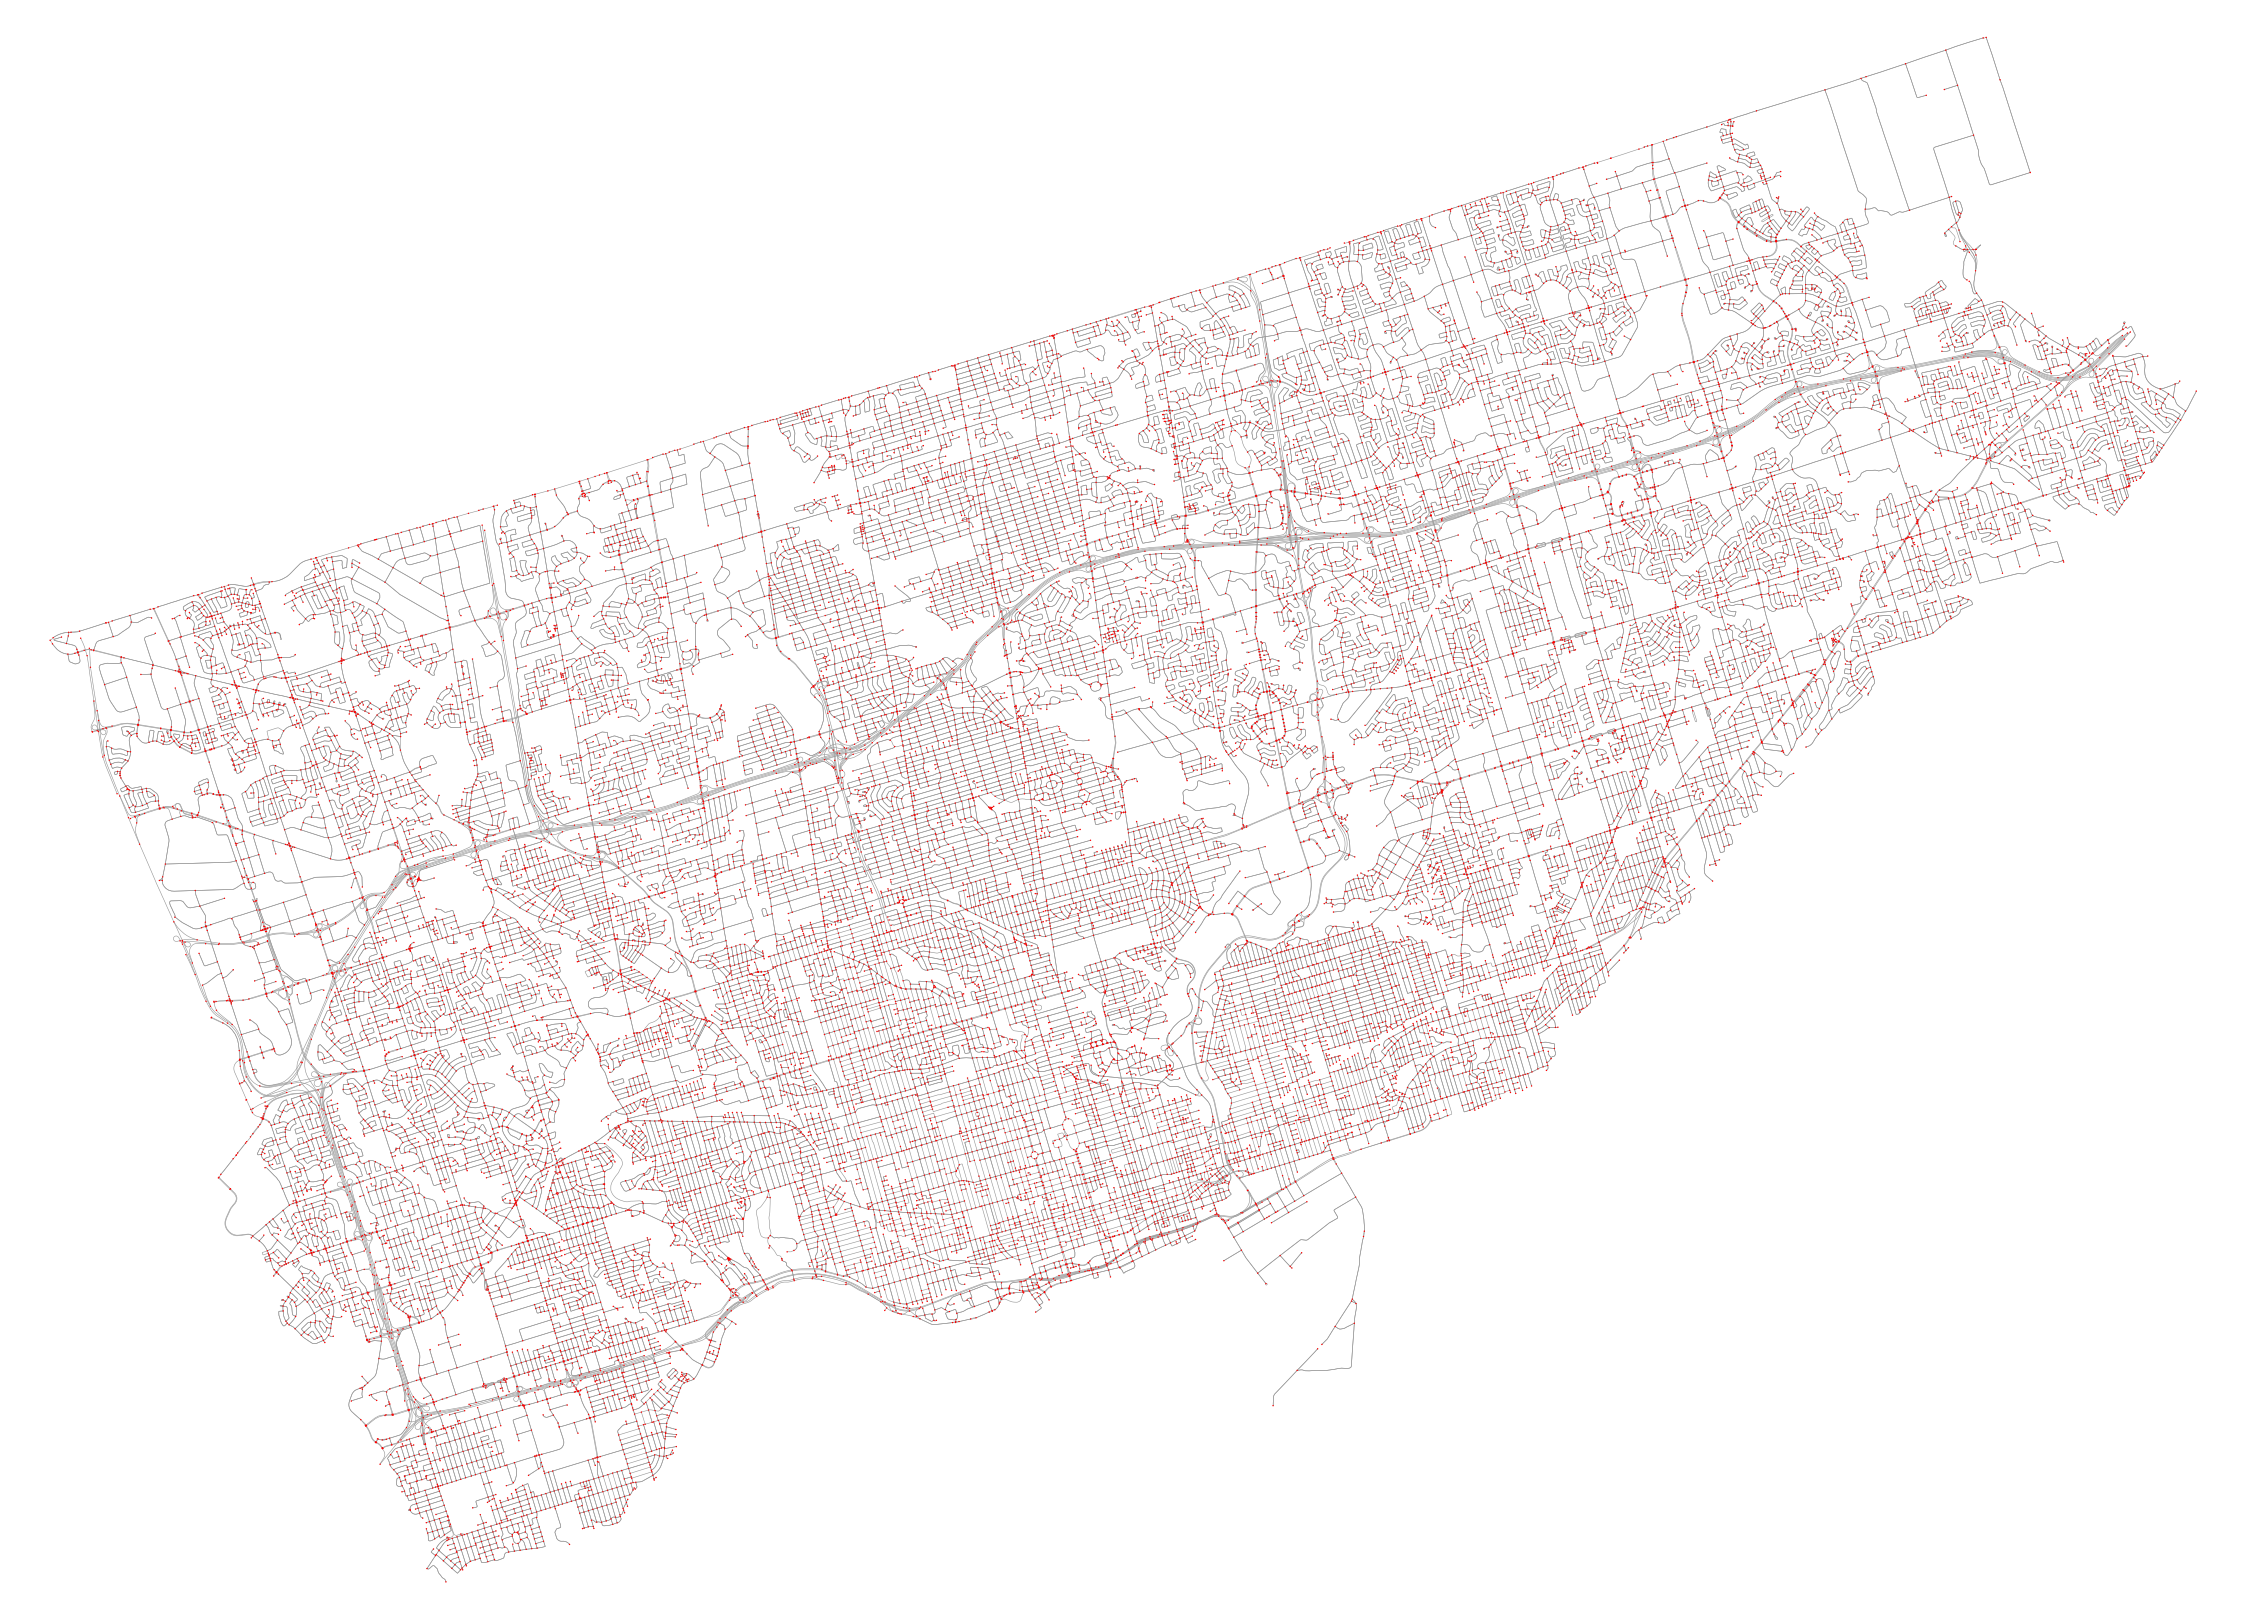

(<Figure size 2880x2880 with 1 Axes>, <AxesSubplot:>)

In [4]:
ox.plot_graph(G, bgcolor='white', node_size=2, node_color="red", edge_linewidth=0.6, edge_alpha=1, dpi=1000, figsize=(40,40))

In [5]:
print(nx.info(G))

Name: 
Type: MultiDiGraph
Number of nodes: 27438
Number of edges: 73174
Average in degree:   2.6669
Average out degree:   2.6669


In [ ]:
nodesG =  list(G.nodes.data())

In [ ]:
nodesG[0]

(1497793,
 {'highway': 'motorway_junction',
  'osmid': 1497793,
  'ref': '14',
  'x': -79.3346901,
  'y': 43.7555309})

In [ ]:
edges =  list(G.edges.data())
edges[160][2]

In [ ]:
nodes =  ox.graph_to_gdfs(GC, edges=False)

In [ ]:
x_gc = nodes.lon.to_dict()
y_gc = nodes.lat.to_dict()

In [ ]:
nx.set_node_attributes(GC,x_gc, 'x')
nx.set_node_attributes(GC,y_gc, 'y')

In [ ]:
nodes_GC = GC.nodes()

In [ ]:
nodes_GC[0]

{'lat': 43.5873289,
 'lon': -79.5478817,
 'osmid': 1610776610,
 'x': -79.5478817,
 'y': 43.5873289}

## KSI Dataset:

In [6]:
ksi_df = gpd.read_file("https://opendata.arcgis.com/datasets/cc17cc27ee5a4989b78d9a3810c6c007_0.geojson")

In [7]:
ksi_df.head()

,Index_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS,District,WardNum,Division,LATITUDE,LONGITUDE,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,Hood_ID,Neighbourhood,ObjectId,geometry
0,3389067,893184,2006,2006-01-01T05:00:00+00:00,236,2,WOODBINE AVE,O CONNOR DR,None,Major Arterial,Toronto and East York,19.0,54,43.699595,-79.318797,Intersection,Intersection Related,No Control,Clear,Dark,Wet,Non-Fatal Injury,Approaching,Passenger,50 to 54,Major,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Yes,None,None,None,None,Yes,Yes,Yes,None,Yes,None,60,Woodbine-Lumsden (60),1,POINT (-79.31880 43.69960)
1,3389068,893184,2006,2006-01-01T05:00:00+00:00,236,2,WOODBINE AVE,O CONNOR DR,None,Major Arterial,Toronto and East York,19.0,54,43.699595,-79.318797,Intersection,Intersection Related,No Control,Clear,Dark,Wet,Non-Fatal Injury,Approaching,Passenger,15 to 19,Minor,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Yes,None,None,None,None,Yes,Yes,Yes,None,Yes,None,60,Woodbine-Lumsden (60),2,POINT (-79.31880 43.69960)
2,3389069,893184,2006,2006-01-01T05:00:00+00:00,236,2,WOODBINE AVE,O CONNOR DR,None,Major Arterial,Toronto and East York,19.0,54,43.699595,-79.318797,Intersection,Intersection Related,No Control,Clear,Dark,Wet,Non-Fatal Injury,Approaching,Driver,55 to 59,Minor,None,North,"Automobile, Station Wagon",Going Ahead,Driving Properly,Normal,None,None,None,None,None,None,None,None,Yes,None,None,None,None,Yes,Yes,Yes,None,Yes,None,60,Woodbine-Lumsden (60),3,POINT (-79.31880 43.69960)
3,3389070,893184,2006,2006-01-01T05:00:00+00:00,236,2,WOODBINE AVE,O CONNOR DR,None,Major Arterial,Toronto and East York,19.0,54,43.699595,-79.318797,Intersection,Intersection Related,No Control,Clear,Dark,Wet,Non-Fatal Injury,Approaching,Passenger,20 to 24,Minor,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Yes,None,None,None,None,Yes,Yes,Yes,None,Yes,None,60,Woodbine-Lumsden (60),4,POINT (-79.31880 43.69960)
4,3389071,893184,2006,2006-01-01T05:00:00+00:00,236,2,WOODBINE AVE,O CONNOR DR,None,Major Arterial,Toronto and East York,19.0,54,43.699595,-79.318797,Intersection,Intersection Related,No Control,Clear,Dark,Wet,Non-Fatal Injury,Approaching,Passenger,15 to 19,Minor,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Yes,None,None,None,None,Yes,Yes,Yes,None,Yes,None,60,Woodbine-Lumsden (60),5,POINT (-79.31880 43.69960)


Combining Date and Hour to have one single column:

In [8]:
ksi_df["DATE"] = pd.to_datetime(ksi_df['DATE']).dt.floor("D") + pd.to_timedelta(ksi_df["HOUR"], unit="hour")

Add datapoints to keep here:

In [9]:
cols_to_keep = ["LATITUDE", "LONGITUDE", "ACCNUM", "DATE", "VISIBILITY", "LIGHT",	"RDSFCOND"]
ksi_df = ksi_df[cols_to_keep]

Counting fatalities using duplicate rows:

In [10]:
fatalities = ksi_df["ACCNUM"].value_counts()
ksi_df["FATALITIES"] = ksi_df["ACCNUM"].apply(lambda x : fatalities[x])

In [11]:
ksi_df = ksi_df.drop_duplicates()
ksi_df.reset_index(drop=True, inplace=True)

In [13]:
ksi_df["G_NODE"]= ox.get_nearest_nodes(G, ksi_df["LONGITUDE"], ksi_df["LATITUDE"])
ksi_df.drop(["LATITUDE", "LONGITUDE"], axis=1, inplace=True)

In [22]:
len(set(ksi_df['G_NODE']))

3709

In [14]:
ksi_df = ksi_df.infer_objects()
ksi_df

,ACCNUM,DATE,VISIBILITY,LIGHT,RDSFCOND,FATALITIES,G_NODE
0,893184,2006-01-01 02:00:00+00:00,Clear,Dark,Wet,8,33771082
1,909646,2006-01-01 03:00:00+00:00,Snow,"Dark, artificial",Slush,5,158754118
2,884090,2006-01-02 07:00:00+00:00,Other,"Dark, artificial",Wet,2,21631723
3,885782,2006-01-04 19:00:00+00:00,Rain,Dark,Wet,2,26007459
4,882079,2006-01-06 22:00:00+00:00,Clear,"Dark, artificial",Dry,2,259750208
...,...,...,...,...,...,...,...
5685,9002468442,2019-12-23 06:00:00+00:00,Clear,Dawn,Wet,2,86186677
5686,9002471073,2019-12-23 14:00:00+00:00,Clear,Daylight,Dry,3,287946845
5687,9002481518,2019-12-25 08:00:00+00:00,Clear,Daylight,Wet,2,1498033
5688,9002496688,2019-12-27 23:00:00+00:00,Clear,"Dark, artificial",Dry,2,392516842


In [20]:
ksi_df["RDSFCOND"].value_counts()

Dry                     4495
Wet                     1000
Other                     58
Loose Snow                50
Slush                     32
Ice                       22
Packed Snow               17
Loose Sand or Gravel       4
Spilled liquid             1
Name: RDSFCOND, dtype: int64

In [26]:
ksi_wet = ksi_df.loc[ksi_df['RDSFCOND'].isin(['Wet', 'Slush', 'Ice', 'Loose Snow', 'Packed Snow' ])]

In [38]:
type(list(ksi_wet['G_NODE']))

list

In [ ]:
ksi_df["LIGHT"].value_counts()

In [24]:
ksi_df["VISIBILITY"].value_counts()

Clear                     4849
Rain                       637
Snow                       113
Other                       41
Fog, Mist, Smoke, Dust      15
Freezing Rain               15
Drifting Snow                7
Strong wind                  3
Name: VISIBILITY, dtype: int64

Creating column of accident objects:

In [ ]:
ksi_df["ACCIDENT"] = ksi_df.apply(lambda x: ACCIDENT(x["ACCNUM"], x["DATE"], x["VISIBILITY"], x["LIGHT"], x["RDSFCOND"], x["FATALITIES"]), axis=1)

In [ ]:
ksi_df

Collapsing dataset to get list of accidents for each node:

In [ ]:
ksi_df = ksi_df.groupby('G_NODE')['ACCIDENT'].apply(list).reset_index(name='ACCIDENTS')

In [ ]:
ksi_df

Converting dataset to dict to set node attributes:

In [ ]:
attr = ksi_df.set_index('G_NODE')['ACCIDENTS'].to_dict()

In [ ]:
nx.set_node_attributes(GC, [], "accident_list")
nx.set_node_attributes(GC, attr, "accident_list")

In [57]:
nc = ['red' if node in list(ksi_wet['G_NODE']) else 'gray' for node in G.nodes()]

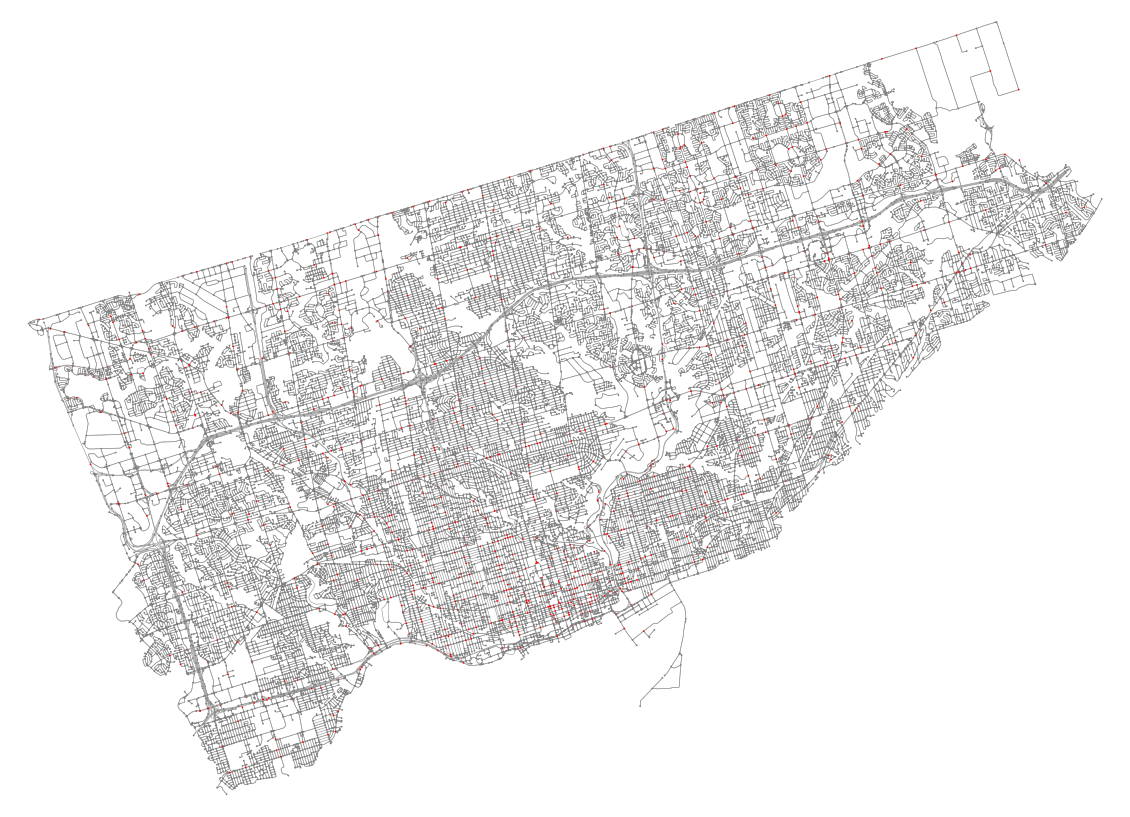

(<Figure size 1440x1440 with 1 Axes>, <AxesSubplot:>)

In [58]:
ox.plot_graph(G, bgcolor='white', node_size=3, node_color=nc, edge_linewidth=0.6, edge_alpha=1, dpi=1000, figsize=(20,20))